# 1 循序渐进——AQI分析与预测
## 1.1 背景信息
AQI(Air Quality Index)，指空气质量指数，用来衡量空气清洁或污染的程度。值越小，表示空气质量越好。近年来，因为环境问题，空气质量也越来越受到人们的重视。

![图像无法显示](imgs/air.jpg "空气污染")

## 1.2 任务说明
我们期望能够对全国城市空气质量进行研究与分析，希望能够解决如下疑问：
* 哪些城市的空气质量较好/较差？
* 临海城市是否空气质量优于内陆城市？
* 空气质量主要受哪些因素影响？
* 是否可以预测城市的空气质量？
* 是否可以预测城市是否临海？

## 1.3 数据集描述
我们现在获取了2015年空气质量指数集。该数据集包含全国主要城市的相关数据以及空气质量指数。

列名 | 含义  
-|-
City | 城市名
AQI | 空气质量指数
Precipitation | 降雨量
GDP | 城市生产总值
Temperature | 温度
Longitude | 经度
Latitude | 纬度
Altitude | 海拔高度
PopulationDensity | 人口密度
Coastal | 是否沿海
GreenCoverageRate | 绿化覆盖率
Incineration(10,000ton) | 焚烧量（10000吨）

# 2 程序实现
## 2.1 导入相关的库
导入需要的库，同时，进行一些初始化的设置。

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

import seaborn as sns
sns.set(style="darkgrid", font="SimHei", rc={"axes.unicode_minus": False})
warnings.filterwarnings("ignore")

## 2.2 加载相关的数据集
* 加载相关的数据集。
* 可以使用head / tail / sample查看数据的大致情况。

In [2]:
data = pd.read_csv("CompletedDataset.csv")
print(data.shape)
data.head()

(323, 12)


,City,AQI,Precipitation,GDP,Temperature,Longitude,Latitude,Altitude,PopulationDensity,Coastal,GreenCoverageRate,"Incineration(10,000ton)"
0,Ngawa Prefecture,23,665.1,271.13,8.200000,102.224650,31.899410,2617.0,11,0,36.00,23.00
1,Aksu City,137,80.4,610.00,12.276712,80.263380,41.167540,1108.0,6547,0,33.94,23.00
2,Alxa League,85,150.0,322.58,24.200000,105.728950,38.851920,1673.0,1,0,36.00,23.00
3,Ngari,28,74.2,37.40,1.000000,80.105800,32.501110,4280.0,1,0,36.00,23.00
4,Anqin City,79,2127.8,1613.20,17.291781,117.034431,30.512646,13.0,2271,0,45.80,27.48


## 2.3 数据清洗
### 2.3.1 缺失值处理

In [3]:
# data.info()
data.isnull().sum(axis=0)

# 关于缺失值的填充，可以选择平均数、中位数等进行填充
# 如果数据集是正态分布，缺失值建议选择均值来填充
# 如果数据集是偏态分布，缺失值使用中位数填充比较合适
# 对于离散的值，则选择众数来填充
# 另外对于其他特殊情况，比如一天的气温中有一个值缺失，可以选择用周边值来填充

City                       0
AQI                        0
Precipitation              0
GDP                        0
Temperature                0
Longitude                  0
Latitude                   0
Altitude                   0
PopulationDensity          0
Coastal                    0
GreenCoverageRate          0
Incineration(10,000ton)    0
dtype: int64

### 2.3.2 异常值处理

In [4]:
data.describe()
# sns.boxplot(data=data["Precipitation"])

,AQI,Precipitation,GDP,Temperature,Longitude,Latitude,Altitude,PopulationDensity,Coastal,GreenCoverageRate,"Incineration(10,000ton)"
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,75.334365,1081.208978,2394.094241,15.989429,113.985779,31.843767,382.250464,2596.560372,0.247678,38.383096,52.418390
std,42.995735,584.634075,3263.974279,5.029369,7.711894,6.099390,743.219135,2913.835552,0.432334,6.321973,91.976476
min,12.000000,56.100000,22.500000,-2.500000,80.105800,18.234043,-12.000000,1.000000,0.000000,7.600000,1.530000
25%,45.000000,581.000000,761.685000,13.750000,111.060575,27.664188,18.000000,714.000000,0.000000,36.000000,18.875000
50%,69.000000,910.000000,1328.520000,16.515068,115.500183,31.340637,62.000000,1787.000000,0.000000,38.690000,24.000000
75%,102.000000,1651.250000,2722.180000,18.928767,119.867274,36.419417,354.500000,3509.000000,0.000000,42.675000,37.630000
max,296.000000,2478.100000,24964.990000,27.447945,129.598496,49.220000,4505.000000,25900.000000,1.000000,76.490000,686.670000


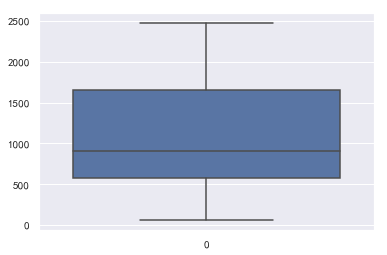

In [5]:
sns.boxplot(data=data["Precipitation"])

### 2.3.3 重复值处理
* 使用duplicate检查重复值。可配合keep参数进行调整。
* 使用drop_duplicate删除重复值。

In [6]:
data.duplicated().sum()

0

## 2.4 数据分析

### 2.4.1 空气质量最好 / 最差的5个城市。
空气质量的好坏可以为我们以后选择工作，旅游等地提供参考。

#### 2.4.1.1 最好的5个城市

,City,AQI
203,Shaoguan City,12
162,Nanping City,12
153,Meizhou City,12
91,Keelung City,13
194,Sanming City,13


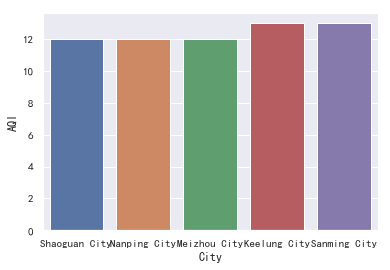

In [7]:
t = data[["City", "AQI"]].sort_values("AQI")       # 选取两个指标根据AQI来进行排序
display(t.iloc[:5])                                # 切片，选取前五条记录
sns.barplot(x="City", y="AQI", data=t.iloc[:5])

我们发现，空气质量最好的5个城市为：
1. 韶关市
2. 南平市
3. 梅州市
4. 基隆市
5. 三明市

#### 2.4.1.2 最差的5个城市

,City,AQI
105,Jiaozuo City,199
111,Jinzhou City,202
13,Baoding City,220
26,Chaoyang City,224
16,Beijing City,296


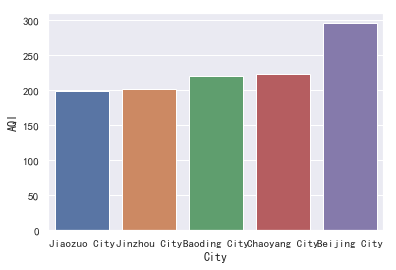

In [8]:
display(t.iloc[-5:])    # 切片，选取最后五条记录
sns.barplot(x="City", y="AQI", data=t.iloc[-5:])

我们得出空气质量最差的5个城市为：
1. 北京市
2. 朝阳市
3. 保定市
4. 锦州市
5. 焦作市

### 2.4.2 临海城市是否空气质量优于内陆城市？

我们首先来统计下临海城市与内陆城市的数量。

0    243
1     80
Name: Coastal, dtype: int64

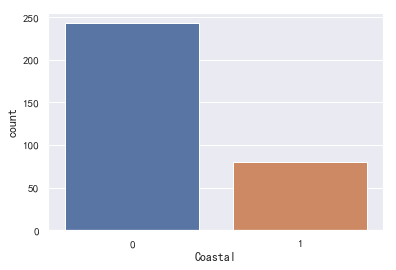

In [9]:
display(data["Coastal"].value_counts())    # 根据是否临海指标进行统计展示，0位不临海（内陆）；1为临海
sns.countplot(x="Coastal", data=data)

然后，我们来观察一下临海城市与内陆城市的散点分布。

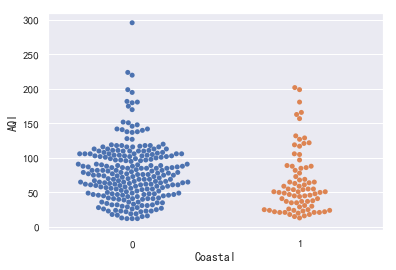

In [10]:
sns.swarmplot(x="Coastal", y="AQI", data=data)    # 蜂窝蜂群图

然后，我们再来分组计算空气质量的均值。

Coastal
0    79.045267
1    64.062500
Name: AQI, dtype: float64

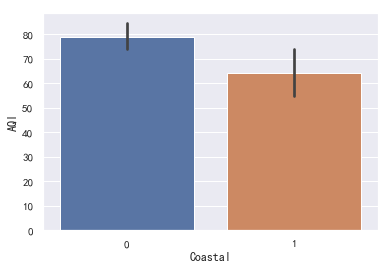

In [11]:
display(data.groupby("Coastal")["AQI"].mean())
sns.barplot(x="Coastal", y="AQI", data=data)

柱形图仅能进行均值对比，我们可以使用箱线图来显示更多的信息。

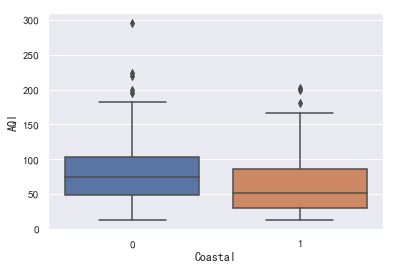

In [12]:
sns.boxplot(x="Coastal", y="AQI", data=data)

#离群点：小于q1 - 1.5IQR   大于q3 + 1.5IQR  （q1:1/4分位；q3：3/4分位；IQR：q1与q3之间的差距）

我们也可以绘制小提琴图，除了能够展示箱线图的信息外，还能呈现出分布的密度。

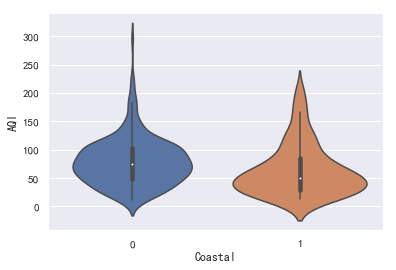

In [13]:
sns.violinplot(x="Coastal", y="AQI", data=data)

我们可以将散点与箱线图或小提琴图结合在一起进行绘制，下面以小提琴图为例。

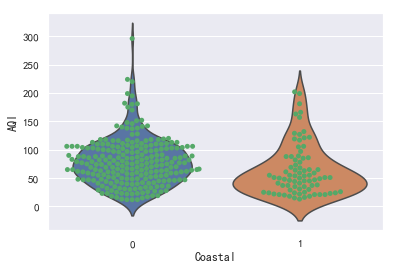

In [14]:
sns.violinplot(x="Coastal", y="AQI", data=data, inner=None)    # inner = None是让上图中小提琴图里的“琴弦”类似箱线图的东西不显示
sns.swarmplot(x="Coastal", y="AQI", color="g", data=data)

### 2.4.3 空气质量主要受哪些因素影响？

#### 2.4.3.1 相关系数

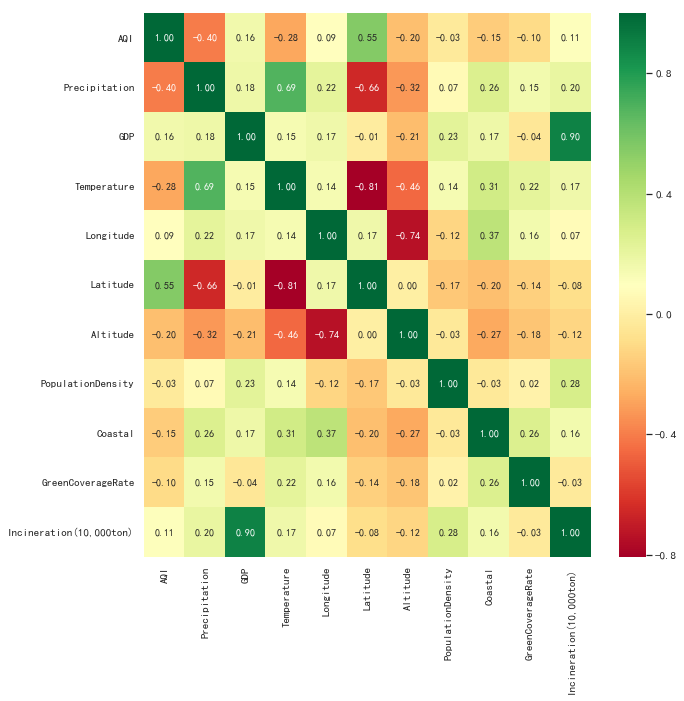

In [15]:
# data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), cmap=plt.cm.RdYlGn, annot=True, fmt=".2f")    # cmap是colormap的意思；annot=True：方块里相关值显示

![图像无法显示](imgs/exercise.png "课堂练习")
观察上图显示的结果，综合来讲，是南方城市空气质量好，还是北方城市空气质量好？  
A 南方城市空气好。  
B 北方城市空气好。  
C 南北方空气质量差不多。  
D 无法判断。
![图像无法显示](imgs/split_line.png "课堂练习")

#### 2.4.3.2 结果统计

从结果中可知，空气质量指数主要受降雨量（-0.40）与纬度（0.55）影响。
* 降雨量越多，空气质量越好。
* 纬度越低，空气质量越好。

此外，我们还能够发现其他一些明显的细节：
* GDP（城市生产总值）与Incineration（焚烧量）正相关（0.90）。
* Temperature（温度）与Precipitation（降雨量）正相关（0.69）。
* Temperature（温度）与Latitude（纬度）负相关（-0.81）。
* Longitude（经度）与Altitude（海拔）负相关（-0.74）。
* Latitude（纬度）与Precipitation（降雨量）负相关（-0.66）。
* Temperature（温度）与Altitude（海拔）负相关（-0.46）。
* Altitude（海拔）与Precipitation（降雨量）负相关（-0.32）。

#### 2.4.3.3 可疑的相关系数值
通过之前的分析，我们得知，临海城市的空气质量，确实好于内陆城市，可是，为什么临海（Coastal）与空气质量指数（AQI）的相关系数（-0.15）并不高呢？

![图像无法显示](imgs/question.jpg "疑问")

### 2.4.4 绘制全国城市的空气质量。
我们来绘制一下全国各城市的空气质量指数。

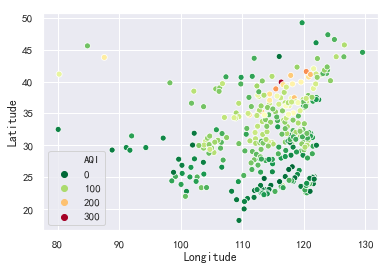

In [15]:
sns.scatterplot(x="Longitude", y="Latitude", hue="AQI", palette=plt.cm.RdYlGn_r, data=data)

从结果我们可以发现，从大致的地理位置上看，西部城市好于东部城市，南部城市好于北部城市。

### 2.4.5 关于空气质量的假设检验
江湖传闻，全国所有城市的空气质量指数均值在71左右，请问，这个消息可靠吗？

![图像无法显示](imgs/question.jpg "疑问")

#### 2.4.5.1 问题下的探索
城市平均空气质量指数，我们可以很容易的进行计算。

In [16]:
data["AQI"].mean()

75.3343653250774

![图像无法显示](imgs/exercise.png "课堂练习")
我们计算的值大于传闻值71，因此，我们认为，江湖传闻实属一派胡言，不可尽信。请问这样认为正确吗？  
A 正确  
B 不正确  
![图像无法显示](imgs/split_line.png "课堂练习")

首先，我们要清楚，江湖传闻的，是全国所有城市的平均空气质量指数，而我们统计的，只是所有城市中的一部分抽样而已。因此，我们一次抽样统计的均值，并不能代表总体（所有城市）的均值。

要弄清江湖传闻是否可靠，最直接有效的方式，就是将全国所有的城市的空气质量指数都测量一下，然后进行求均值。然而，这是非常繁重且不现实的任务。因此，可行的方案是，我们从全国所有城市中进行抽样，使用抽样的均值来估计总体的均值。

#### 2.4.5.2 总体与样本的分布
在数学上，我们有如下的定理：  
如果总体（分布不重要）均值为$\mu$，方差为$\sigma^2$，则样本均值服从正态分布：$\bar{X}$ ~ $N(\mu, \sigma^2 / n)$。其中，n为每次抽样含有个体的数量。

我们可以得到如下结论：
1. 进行多次抽样（每次抽样包含若干个个体），则每次抽样会得到一个均值，这些均值会围绕在总体均值左右，呈正态分布。
2. 样本均值构成正态分布，其均值等于总体均值。
3. 样本均值构成正态分布，其标准差等于总体标准差除以$\sqrt{n}$。

29.574005922743712

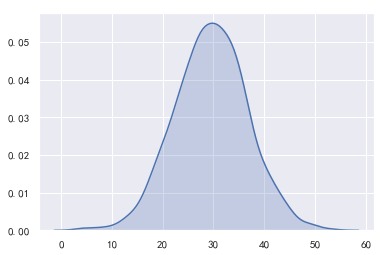

In [17]:
# 模拟总体样本，normal：产生一个正态分布；loc=30：总体均值30；scale=50：标准差；size=10000数量
all = np.random.normal(loc=30, scale=50, size=10000)
mean_arr = np.zeros(2000)    # 抽样：20000次，占位
for i in range(len(mean_arr)):
    mean_arr[i] = np.random.choice(all, size=50, replace=False).mean()    # size=50：个体数量50，每次抽取50个；replace=False：不放回的抽样
display(mean_arr.mean())    # mean_arr.mean()：样本均值
sns.kdeplot(mean_arr, shade=True)

#### 2.4.5.3 置信区间
接下来，我们现在根据正态分布的特性，进行概率上的统计，如下图：
![图形无法显示](imgs/normal.jpg "正态分布统计")

* 以均值为中心，在一倍标准差内$(\bar{x} - \sigma, \bar{x} + \sigma)$，包含68%的样本数据。
* 以均值为中心，在二倍标准差内$(\bar{x} - 2\sigma, \bar{x} + 2\sigma)$，包含95%的样本数据。
* 以均值为中心，在三倍标准差内$(\bar{x} - 3\sigma, \bar{x} + 3\sigma)$，包含99.7%的样本数据。

因此，如果多次抽样，则样本均值构成的正态分布。如果我们对总体进行一次抽样，则本次抽样个体的均值有95%的概率会在二倍标准差内，仅有5%的概率会在二倍标准差外。根据小概率事件（很小的概率在一次抽样中基本不会发生），如果抽样的个体均值落在二倍标准差之外，我们就可以认为，本次抽样来自的总体，该总体的均值并非是我们所期望的均值。

通常，我们以二倍标准差作为判定依据，则二倍标准差围成的区间，称为置信区间。该区间，则为接受域，否则为拒绝域。

In [18]:
# 定义标准差
scale = 50
# 定义数据。
x = np.random.normal(0, scale, size=100000)
# 定义标准差的倍数，倍数从1到3。
for times in range(1, 4):
    y = x[(x >= -times * scale) & (x <= times * scale)] 
    print(len(y) / len(x))

0.68416
0.95544
0.99712


#### 2.4.5.4 假设检验——t检验
假设检验，其目的是通过收集到的数据，来验证某个假设是否成立。在假设检验中，我们会建立两个完全对立的假设，分别为原假设（零假设）$H_0$与备则假设（对立假设）$H_1$。然后根据样本信息进行分析判断，得出P值（概率值）。

假设检验基于小概率反证法，即我们认为小概率事件在一次试验中是不会发生的。如果小概率事件发生，则我们就拒绝原假设，而接受备择假设。否则，我们就没有充分的理由推翻原假设，此时，我们选择去接受原假设。

t检验，就是假设检验的一种，可以用来检验一次抽样中样本均值与总体均值的比较。其计算方式如下：  
<font size=10>
$t = \frac{\bar{x} - \mu_0}{S_\bar{x}} = \frac{\bar{x} - \mu_0}{S / \sqrt{n}}$
</font>  

* $\bar{x}$为一次抽样中，所有个体的均值。
* $\mu_0$为待检验的均值。
* $S_\bar{x}$为样本均值的标准差（标准误差）。
* S为一次抽样中，个体的标准差。
* n为一次抽样中，个体的数量。

t值体现的，就是我们一次抽样中，个体均值与待检验的总体均值的偏离程度，如果偏离超过一定范围（通产为2倍的标准差），则拒绝原假设，接受备择假设。

In [19]:
mean = data["AQI"].mean()
std = data["AQI"].std()
print(mean, std)
t = (mean - 71) / (std / np.sqrt(len(data)))
print(t)

75.3343653250774 42.99573460517677
1.8117630617496865


我们可以看到，偏离均值不足2倍的标准差，因此，P值应该大于5%，我们无法拒绝原假设。因此，江湖传闻还是有一定依据的。此外，我们也可以通过scipy提供的相关方法来进行t检验的计算，无需自行计算。

In [20]:
from scipy import stats

stats.ttest_1samp(data["AQI"], 71)    # ttest_1samp：单样本的t检验；   统计学中0.05称为显著性水平

Ttest_1sampResult(statistic=1.8117630617496872, pvalue=0.07095431526986647)

同样，我们现在可以来计算下，全国所有城市平均空气质量指数的置信区间。

In [21]:
mean - 1.96 * (std / np.sqrt(len(data))), mean + 1.96 * (std / np.sqrt(len(data)))    # 真实的95%（2倍）是1.96倍

(70.64536585461275, 80.02336479554205)

由此，我们就计算出全国所有城市平均空气质量指数，95%的可能在大致在70.55 ~ 80.12之间。  
此外，我们也可以将计算的值代入ttest_1samp放入中进行验证。

In [22]:
print(stats.ttest_1samp(data["AQI"], 70.64536585461275))
print(stats.ttest_1samp(data["AQI"], 80.02336479554205))

Ttest_1sampResult(statistic=1.9599999999999989, pvalue=0.050857948670129036)
Ttest_1sampResult(statistic=-1.9599999999999989, pvalue=0.050857948670129036)


In [23]:
0.1 + 0.2      # 详见IEEE754规范 （小数的规范）

0.30000000000000004

结果可知，t值大致为1.96，p值大致为临界值5%。

### 2.4.6 对空气质量指数进行预测。
对于某城市，如果我们已知降雨量，温度，经纬度等指标，我们是否能够预测该城市的空气质量指数呢？

答案是肯定的。我们可以通过对以往的数据，去建立一种模式，然后将这种模式去应用于未知的数据，进而预测结果。数据建模可以采用很多种机器学习算法来实现，我们以线性回归为例。

#### 一元线性回归
回归分析是用来评估变量之间关系的统计过程。用来解释自变量X与因变量Y的关系。即当自变量X发生改变时，因变量Y会如何发生改变。线性回归，是回归分析的一种，评估的自变量X与因变量Y之间是一种线性关系。当只有一个自变量时，称为一元线性回归，当具有多个自变量时，称为多元线性回归。


我们从简单的一元线性回归开始。这里，我们以房屋面积（x）与房屋价格（y）为例，显而易见，二者是一种线性关系，房屋价格正比于房屋面积，我们假设比例为w：  
$\hat{y} = w * x$  
然而，这种线性方程一定是过原点的，即当x为0时，y也一定为0。这可能并不符合现实中某些场景。为了能够让方程具有更广泛的适应性，我们这里再增加一个截距，设为b，即之前的方程变为：  
$\hat{y} = w * x + b$  
而以上方程，就是我们数据建模的模型。方程中的w与b，就是模型的参数。
假定数据集如下：  

| 房屋面积 | 房屋价格 |
| ------ | ------ |
| 30 | 100 |
| 40 | 120 |
| 40 | 115 |
| 50 | 130 |
| 50 | 132 |
| 60 | 147 |

线性回归是用来解释自变量与因变量之间的关系，但是，这种关系并非严格的函数映射关系。从数据集中，我们也看到了这一点。相同面积的房屋，价格并不完全相同，但是，也不会相差过大。 

#### 多元线性回归
然而，现实中的数据可能是比较复杂的，自变量也很可能不只一个。例如，影响房屋价格也很可能不只房屋面积一个因素，可能还有距地铁距离，距市中心距离，房间数量，房屋所在层数，房屋建筑年代等诸多因素。不过，这些因素，对房屋价格影响的力度（权重）是不同的，例如，房屋所在层数对房屋价格的影响就远不及房屋面积，因此，我们可以使用多个权重来表示多个因素与房屋价格的关系：  
$\hat{y} = w_{1} * x_{1} + w_{2} * x_{2} + w_{3} * x_{3} + …… + w_{n} * x_{n} + b$  

#### 目标
我们现在的目的就是，从现有的数据（经验）中，去学习（确定）w与b的值。一旦w与b的值确定，我们就能够确定拟合数据的线性方程，这样就可以对未知的数据x（房屋面积，房屋建筑年代等）进行预测y（房屋价格）。我们求解w与b的依据就是，找到一组合适的w与b，使得模型的预测值可以与真实值的总体差异最小化。

![图像无法显示](imgs/linear_regression.png "线性回归")

In [24]:
from sklearn.linear_model import LinearRegression    # sklearn库，是一个机器学习的库，linear_model线性的模型， LinearRegression是线性回归的类
from sklearn.model_selection import train_test_split   # train_test_split方法：训练集和测试集的切分

X = data.drop(["City","AQI"], axis=1)    # X值，drop删除
y = data["AQI"]   # 需要预测的y值
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)   # 切分的部分，x和y，test_size切分比例(25%测试集)
lr = LinearRegression()    # 创建线性回归的模型
lr.fit(X_train, y_train)
display(lr.coef_)    # 输出方程中的w
display(lr.intercept_)    # 输出方程中的b
y_hat = lr.predict(X_test)
display(lr.score(X_train, y_train))
display(lr.score(X_test, y_test))

array([-1.48532488e-02,  1.71080407e-03,  2.86391533e+00, -2.31034144e+00,
        5.28484647e+00, -2.34234723e-02, -2.73893202e-04, -2.48823129e+00,
       -5.79124501e-01,  3.32021411e-02])

169.08033900433304

0.46833945311548286

0.3074830894047559

Text(0.5, 1.0, '线性回归预测结果')

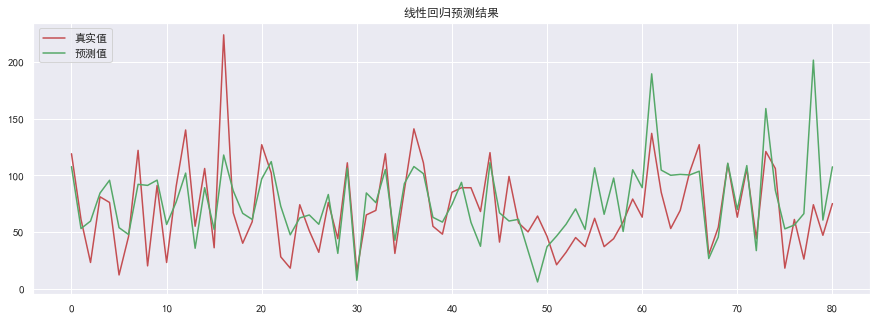

In [25]:
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, "-r", label="真实值")
plt.plot(y_hat, "-g", label="预测值")
plt.legend()
plt.title("线性回归预测结果")

### 对是否临海进行预测。
对于某城市，假设是否临海未知，但知道其他信息，我们试图使用其他信息，来预测该城市是否临海。

#### 逻辑回归
逻辑回归，我们不要被其名字所误导，实际上，逻辑回归是一个分类算法。其优点在于，逻辑回归不仅能够进行分类，而且还能够获取属于该类别的概率。这在现实中是非常实用的。例如，某人患病的概率，明天下雨的概率等。  

逻辑回归实现分类的思想为：将每条样本进行“打分”，然后设置一个阈值，达到这个阈值的，分为一个类别，而没有达到这个阈值的，分为另外一个类别。对于阈值，比较随意，划分为哪个类别都可以，但是，要保证阈值划分的一致性。

#### 算法模型
对于逻辑回归，模型的前面与线性回归类似：  
$z = w_1x_1 + w_2x_2 + …… + w_nx_n + b$  
不过，z的值是一个连续的值，取值范围为$(-\infty , +\infty)$我们需要将其转换为概率值，逻辑回归使用sigmoid函数来实现转换，该函数的原型为：  
$sigmoid(z) = \frac{1}{1 + e^{-z}}$  
![图像无法显示](imgs/sigmoid.png "sigmoid函数")
当z的值从$-\infty$向$+\infty$过度时，sigmoid函数的取值范围为\[0, 1\]，这正好是概率的取值范围，当$z=0$时，sigmoid(0)的值为0.5。因此，模型就可以将sigmoid的输出p作为正例的概率，而1 - p作为负例的概率。以阈值0.5作为两个分类的标准，假设真实的分类y的值为1与0，则：  
$
\hat y = \left\{\begin{matrix}
1\quad p >= 0.5\\ 
0\quad p < 0.5
\end{matrix}\right.
$  
因为概率p就是sigmoid函数的输出值，因此有：  
$
\hat y = \left\{\begin{matrix}
1\quad sigmoid(z) >= 0.5\\ 
0\quad sigmoid(z) < 0.5
\end{matrix}\right.
$  
也可以表示为：  
$
\hat y = \left\{\begin{matrix}
1\quad z >= 0\\ 
0\quad z < 0
\end{matrix}\right.
$  

In [ ]:
from sklearn.linear_model import LogisticRegression

X = data.drop(["City","Coastal"], axis=1)
y = data["Coastal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
lr = LogisticRegression(C=0.0001)
lr.fit(X_train, y_train)
display(lr.coef_)
display(lr.intercept_)
y_hat = lr.predict(X_test)
display(lr.score(X_train, y_train))
display(lr.score(X_test, y_test))

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, marker="o", c="r", ms=8, ls="", label="真实值")
plt.plot(y_hat, marker="x", color="g", ms=8, ls="", label="预测值")
plt.legend()
plt.title("逻辑回归预测结果")

In [ ]:
probability = lr.predict_proba(X_test)
print(probability[:10])
print(np.argmax(probability, axis=1))
index = np.arange(len(X_test))
pro_0 = probability[:, 0]
pro_1 = probability[:, 1]
tick_label = np.where(y_test == y_hat, "O", "X")
plt.figure(figsize=(15, 5))
# 绘制堆叠图
plt.bar(index, height=pro_0, color="g", label="类别0概率值")
# bottom=x，表示从x的值开始堆叠上去。
# tick_label 设置标签刻度的文本内容。
plt.bar(index, height=pro_1, color='r', bottom=pro_0, label="类别1概率值", tick_label=tick_label)
plt.legend(loc="best", bbox_to_anchor=(1, 1))
plt.xlabel("样本序号")
plt.ylabel("各个类别的概率")
plt.title("逻辑回归分类概率")
plt.show()

## 总结
1. 空气质量总体分布上来说，南部城市优于北部城市，西部城市优于东部城市。
2. 临海城市的空气质量整体上好于内陆城市。
3. 是否临海，降雨量与纬度对空气质量指数的影响较大。
4. 我国城市平均空气质量指数大致在(70.55 ~ 80.12)这个区间内，在该区间的可能性概率为95%。
5. 通过历史数据，我们可以对空气质量指数进行预测。
6. 通过历史数据，我们可以对城市是否临海进行预测。